# Simple image blur by convolution with a Gaussian kernel

Blur an an image (./elephant.png) using a Gaussian kernel.

Convolution is easy to perform with FFT: convolving two signals boils down to multiplying their FFTs (and performing an inverse FFT).

In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

### Original Image Input

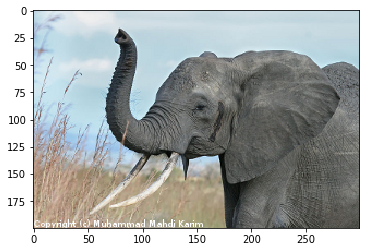

In [2]:
# read local image
img = plt.imread('/Users/cagataycali/Desktop/gaussian-blur-convolution/elephant.png')

# Generate plot
plt.figure()

# Draw image on plot
plt.imshow(img)

# Show plot
plt.savefig('1.png')

**Prepare an Gaussian convolution kernel**

In [3]:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

In [4]:
# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

**Implement convolution via FFT**

In [17]:
# Padded fourier transform, with the same shape as the image
# We use :func:`scipy.signal.fftpack.fft2` to have a 2D FFT
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [6]:
# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))

/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [7]:
# the 'newaxis' is to match to color direction
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [8]:
# clip values to range
img2 = np.clip(img2, 0, 1)

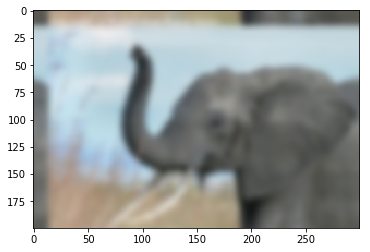

In [9]:
# plot output
plt.figure()
plt.imshow(img2)
plt.savefig('2.png')